In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

from keras.utils import to_categorical
import os
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Function to read data from CSV files
def read_data_from_csv(folder_path):
    dfs = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [5]:
# Read data from train and test folders
combined_data = read_data_from_csv('/content/drive/My Drive/datasets/train')


In [6]:
# Encoding categorical variables
encoder = LabelEncoder()
combined_data['label'] = encoder.fit_transform(combined_data['label'])


In [7]:
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    combined_data.drop(columns=['label']),  # Features
    combined_data['label'],  # Target variable
    test_size=0.2,  # 20% of data will be used for testing
    random_state=42,  # For reproducibility
    stratify=combined_data['label']  # Ensure same label proportions in train and test sets
)

In [16]:
# Scaling numerical variables
scaler = StandardScaler()
X_train_combined_scaled = scaler.fit_transform(X_train_combined)
X_test_combined_scaled = scaler.transform(X_test_combined)


In [8]:
# Create base learner
base_learner = DecisionTreeClassifier()

# Create Bagging classifier with random subspaces
bagging_classifier = BaggingClassifier(base_estimator=base_learner, n_estimators=50, max_features=0.5)


In [21]:
# Train Bagging classifier
history = bagging_classifier.fit(X_train_combined_scaled, y_train_combined)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [22]:
# Make predictions
bagging_predictions = bagging_classifier.predict(X_test_combined_scaled)


In [23]:
# Calculate accuracy
bagging_accuracy = accuracy_score(y_test_combined, bagging_predictions)

# Print accuracy
print("Bagging Classifier Accuracy:", bagging_accuracy)


Bagging Classifier Accuracy: 0.9953903513474873


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_combined, bagging_predictions)


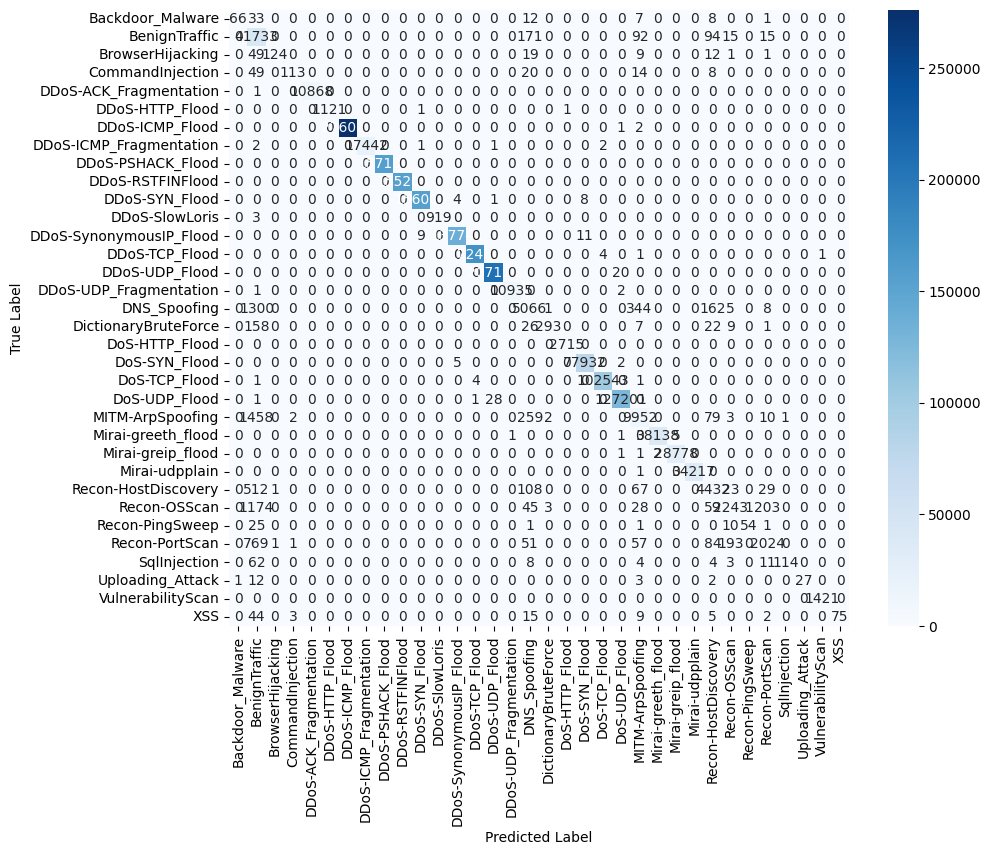

In [26]:

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
# plt.title("Confusion Matrix for the Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Print classification report
print("Classification Report for Bagging Classifier:")
print(classification_report(y_test_combined, bagging_predictions))

Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

           0       1.00      0.53      0.69       127
           1       0.89      0.99      0.94     42120
           2       0.97      0.59      0.73       215
           3       0.97      0.56      0.71       204
           4       1.00      1.00      1.00     10869
           5       1.00      1.00      1.00      1123
           6       1.00      1.00      1.00    276025
           7       1.00      1.00      1.00     17448
           8       1.00      1.00      1.00    157130
           9       1.00      1.00      1.00    155203
          10       1.00      1.00      1.00    156016
          11       1.00      1.00      1.00       922
          12       1.00      1.00      1.00    137762
          13       1.00      1.00      1.00    172502
          14       1.00      1.00      1.00    207216
          15       1.00      1.00      1.00     10938
          16       0.87      0.75  